## Class 5 Agenda:
  * **Brief introduction to machine learning**
  * **Linear Regression**
  * **Model Evaluation using Train/Test split**
  * **Logistic Regression** (next notebook)

### Brief introduction to Machine Learning

Up to this point, we've just been exploring data. Generating statistical summaries of different rows and columns in our datasets is useful and helps us answer certain kinds of questions about historical trends we see, but it gets us nowhere when we want to **predict** something useful using our data in the future. We've been doing description, but now we are going to move on to prediction.

Before we get started with actual machine learning, we need to understand some of the language used to describe the classes of problems that machine learning can be used to solve.

### Major types of machine learning:
|             | **Supervised**     | **Unsupervised**      |
|-------------|----------------|-------------------|
| **Continuous**  | Regression     | Clustering, PCA   |
| **Categorical** | Classification | Association Rules |

In the machine learning universe the most common tasks are:
  * **Supervised learning problems** involve constructing an accurate model that can **predict some kind of an outcome when past data has labels for those outcomes** [supervised learning wikipedia page](https://en.wikipedia.org/wiki/Supervised_learning)
  * **Unsupervised learning problems** involve constructing models where labels on historical data are unavailable.[unsupervised learning wikipedia page](https://en.wikipedia.org/wiki/Unsupervised_learning)

Today we will be talking about two **supervised learning** approaches.

Within the universe of supervised machine learning problems, there exist two distinct classes of problems.

These classes are based completely on the kind of value or values we are trying to predict:
  * A **classification problem** is a **supervised learning problem** where the objective is to learn to predict a categorical value.
  * A **regression problem** is a **supervised learning problem** where the objective is to learn to predict a continuous value.

We will start with learning about **linear regression**, a machine learning modeling approach that has classically been used for **regression** problems.

### Linear Regression Intro

Linear regression has been used extensively for a whole myriad of distinct regression problems in the past. 

Linear regression is the first model that we will learn because:
  * it is widely used
  * is very quick and easy to set up
  * a trained linear regression model is very easy to understand.
  
Really, it's critical to understand linear regression because it is the foundational machine learning modeling approach on which many other methods are based.

By the end of this notebook you will:

- Have a working conceptual understanding of linear regression and become familiar with some key terminology
- Be able to apply linear regression to a machine learning problem using scikit-learn
- Be able to interpret linear regression model coefficients
- Be able to apply three different evaluation metrics for regression
- Be able to use train/test split to estimate model performance on unseen data 
- Be able to articulate the strengths and weaknesses of linear regression

We will be using the default machine learning library in **Python**, [scikit-learn](http://scikit-learn.org/stable/), which has all of the functionality we will need to explore linear regression.

Let's get started by importing all of the functionality we will need for this lesson:

In [1]:
# Python 2 and 3 compatibility
from __future__ import print_function

# Data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression   
from sklearn.cross_validation import train_test_split   # just import corss-validation training set to test
from sklearn import metrics                             # your model, etc.  
import scipy.stats as stats

# Visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

### linear regression on one variable (simple linear regression)

Linear regression on one variable (simple linear regression) is an approach for predicting a **continuous response** using a **single feature**. We assume our data can be represented with a function that looks like this:

$y_i = \beta_0 + \beta_1x_i + \epsilon_i$

- $y_i$ is the response of a single observation
- $x$ is one value of the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x
- $\epsilon$ is the error

$\beta_0$ and $\beta_1$ are called the **model coefficients**. They are the values we are going to estimate, or learn, from our data to find the best fit model.

$\beta_0$ is also called the bias (its an offset), and is equivalent to the y-intercept of the model

(remember $y = mx + b$ from school? $m=\beta_1$ and $b=\beta_0$ here).

So, **our model must "learn" the values of these coefficients, and once we've learned these coefficients, we can use the model to predict mpg.**

Let's examine how this happens by looking at some simple data:

In [2]:
height = np.array([64, 69, 72, 73, 74, 76])   # height in inches
shoe = np.array([8,  9, 10, 11, 12, 13])      # shoe size

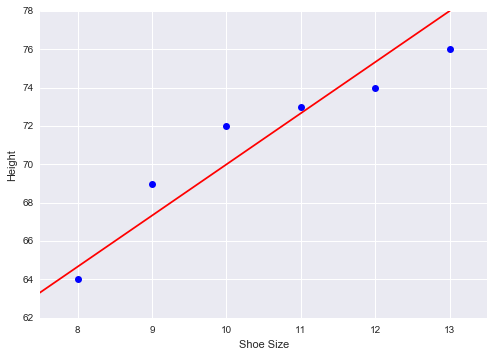

In [3]:
lineX = [7, 13]   # line extendes from 7 to 13 on the x-axis
lineY = [62, 78]  # line extends from 62 to 78 on the y-axis
plt.plot(lineX, lineY, 'r')
plt.plot(shoe, height, 'bo')
plt.xlabel("Shoe Size")
plt.ylabel("Height")
plt.xlim(7.5,13.5)
plt.ylim(62,78)
plt.show()

Clearly this is not a perfect fit - and in practice it never will be. But we need a way to determine which line is best. We can do this by calculating the sum of the squared errors:

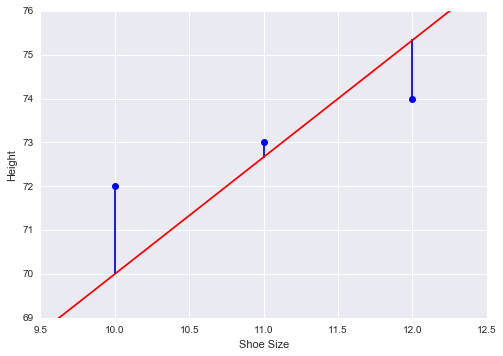

In [4]:
upper_error = [0.75,0,0,0,1.35,2]
lower_error = [0,1.5,2,.35,0,0]
asymmetric_error = [lower_error, upper_error]
plt.plot(lineX, lineY, 'r')
plt.errorbar(shoe, height, yerr=asymmetric_error, fmt='bo')
plt.xlabel("Shoe Size")
plt.ylabel("Height")
plt.xlim(9.5,12.5)
plt.ylim(69,76)
plt.show()

### Estimating ("learning") simple linear regression model coefficients

Coefficients are estimated during the model fitting process using the **least squares criterion**.

We will find the line which minimizes the **sum of squared errors**:

$\textrm{Total error} = \sum\limits_{\textrm{all points}} (y_{actual} - y_{prediction})^2 = \sum\limits_{\textrm{i}} (y_{i} - (\beta_0 + \beta_1x_i))^2$


This is now a calculus problem - finding the values that minimize an equation.

One way to do this is called [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent).


Let's look at some real data.

### Reading in the car dataset

Now that we've got all of the libraries we need, lets get some data to work with.

This data comes from the famous [UC Irvine Machine Learning Repository](http://archive.ics.uci.edu/ml/):

In [5]:
# read data into a DataFrame
data = pd.read_csv("../data/auto_mpg_data.csv")  # data set from UCI Machine Learning Repository
data.head()
# Note that one of our eventual goals here is to predict gas mileage. 

,cylinders,displacement,horsepower,weight,acceleration,mpg
0,8,307.0,130.0,3504.0,12.0,18.0
1,8,350.0,165.0,3693.0,11.5,15.0
2,8,318.0,150.0,3436.0,11.0,18.0
3,8,304.0,150.0,3433.0,12.0,16.0
4,8,302.0,140.0,3449.0,10.5,17.0


In [6]:
data.info()  # 392 rows and 6 columns
# Shows us there is no missing data
# Note that features are: cylinders, displacement, horsepower, weight, acceleration

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
mpg             392 non-null float64
dtypes: float64(5), int64(1)
memory usage: 18.4 KB


Each row in this dataset, called an **observation** represents **one car model** (392 models in the dataset).

Our goal will be to try to build a model that, when given some features describing a car model, can accurately predict the expected mpg of the vehicle.

What are the **features**? (What data can we use to generate our prediction?)

- **cylinders:** The number of cylinders in the model (numeric discrete)
- **displacement:** [engine displacement](https://en.wikipedia.org/wiki/Engine_displacement) (continuous)
- **horsepower:** horsepower of the model (continuous)
- **weight:** total weight of the car (continuous)
- **acceleration:** The vehicle acceleration rate of the model (continuous)

What is the **response**? (What are we trying to predict?)

- **mpg:** approximate miles per gallon of the model (continuous)

### You should immediately have questions about the data

1. Is there a relationship between any of the properties of the car models in our dataset?
2. How strong is that relationship?
3. Do any of the properties of the cars seem to relate to its mpg?
4. What is the effect of each car attribute on mpg?

### Visualize relationships among the features and the outcome

The quickest, most effective way you can quickly see if any of the features correlate with your response is to use a **scatter plot** to visualize them:

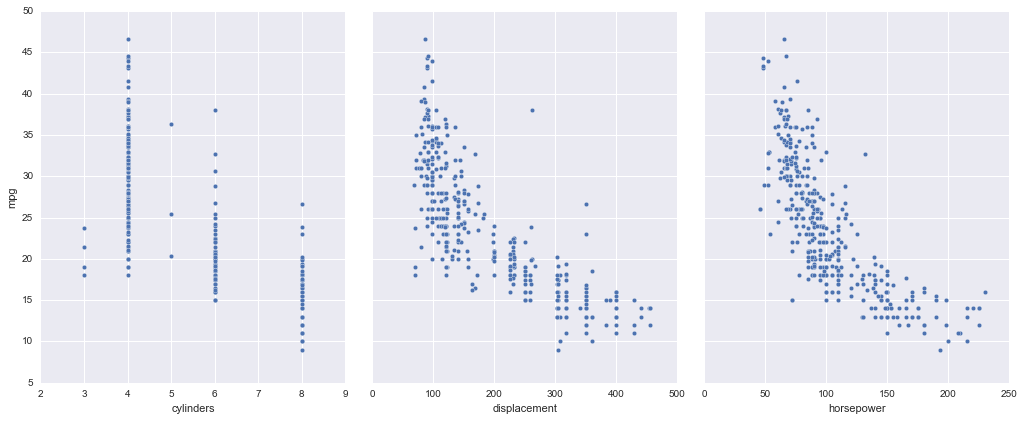

In [7]:
sns.pairplot(data, x_vars=['cylinders','displacement','horsepower'], y_vars='mpg', size=6, aspect=0.8);

Here we just tried to see if there was any relationship between cylinders/displacement/horsepower and mpg for each feature by itself. Looks like all 3 are negatively correlated with mpg.

If we wanted to see what the simple linear regression on each feature by itself looks like (we will get to what that actually is shortly), we can plot a regression line:

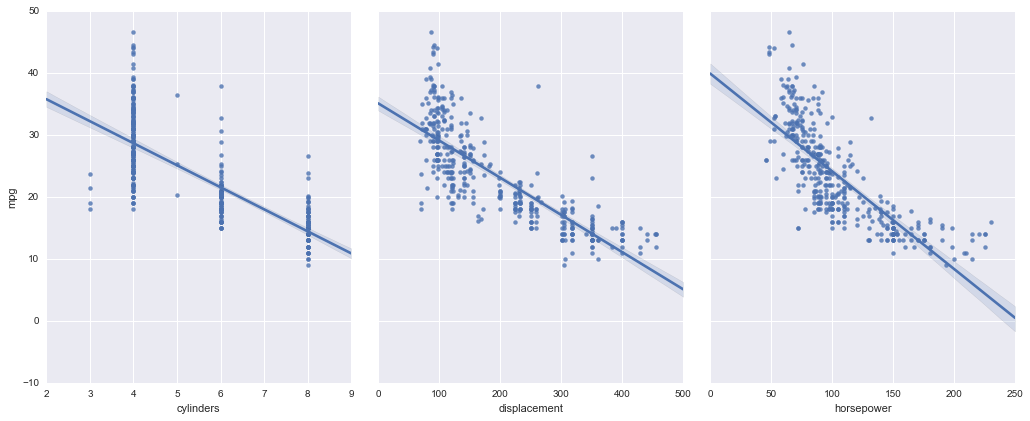

In [8]:
sns.pairplot(data, x_vars=['cylinders','displacement','horsepower'], y_vars='mpg', size=6, aspect=0.8, kind='reg');

You can also use a **correlation matrix** to compute the pairwise correlations between all numeric variables.

Let's first just compute and inspect the correlation matrix:

In [9]:
auto_correlations = data.corr()
auto_correlations

,cylinders,displacement,horsepower,weight,acceleration,mpg
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.777618
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.805127
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.778427
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.832244
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.423329
mpg,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,1.000000


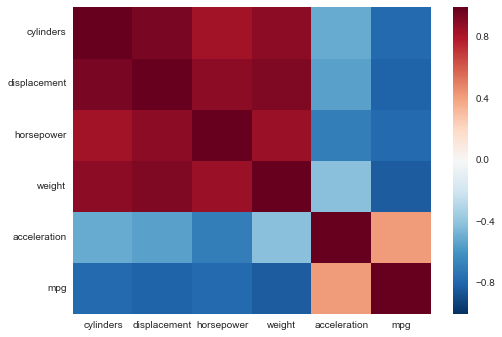

In [10]:
sns.heatmap(auto_correlations);

Ok, enough exploring, lets get to building some models.

We will use `scikit-learn` for the first time here and work through the process of training a scikit-learn model.

Here's a link to the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [12]:
# These were already imported above, but I'm repeating them here for clarity
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

feature_cols = ['displacement']
X = data[feature_cols]  # We create a matrix X here that holds our features
y = data.mpg    # We create a vector y that holds our response variables across all the observatons in our dataset.
print(X.shape)
print(y.shape)
# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print("The y intercept:", linreg.intercept_)
print("The single coefficient:", linreg.coef_)

# We've trained our first model here.
# beta_0 = 35.12
# beta_1 = -0.0600  (this is usually a list) -- this is the acceleration coefficient

(392, 1)
(392,)
The y intercept: 35.1206359384
The single coefficient: [-0.06005143]


Ok, so what did we do here?

1. We created a matrix `X` that held our features and a vector `y` that held our response variable across all the observations in our dataset.
2. We then instantiated (created) a `LinearRegression` model. 
3. However, that model was initially untrained (didn't have our data fit to it). In order to do that, we had to call the `fit` method of the `LinearRegression` object `linreg` we had just created using our features `X` and outcome `y` as input parameters.
4. After we called `fit` on our model, the simple linear regression model was fit. Following this, we inspected our two coefficients.
  
Just to hammer all of this home, let's take a look at what this "visually" looks like using `pairplot`:

(0, 50.0)

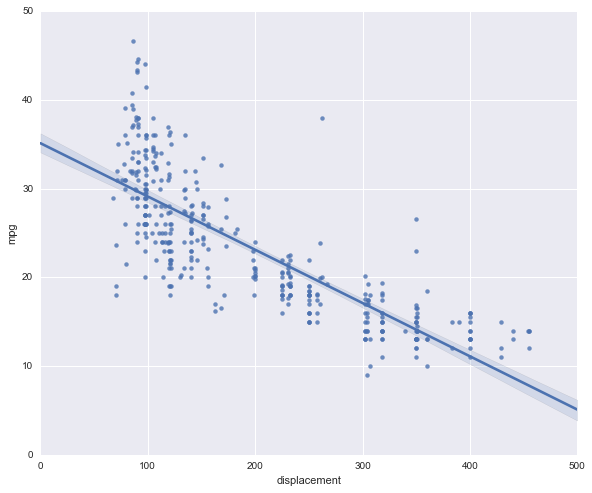

In [12]:
sns.pairplot(data,x_vars=['displacement'],y_vars='mpg',size=7, aspect=1.2,kind='reg')
sns.plt.xlim(0,)
sns.plt.ylim(0,)
# This is what our fit looks like

### How to interpret model coefficients

So, now that we've got a fitted linear regression model, how do we interpret the acceleration coefficient ($\beta_1$)?

A "unit" increase in displacement is **associated with** a -0.06 change in mpg.

Keep in mind that this is not a statement of **causation**, but of **correlation**.

What would the coefficient look like if an increase in displacement was associated with a **decrease** in mpg?

### Using the model for prediction

Let's say that there was a new car model that had a displacement of 250. What would we predict the mpg of that model to be?

$$y = \beta_0 + \beta_1 x$$
$$y = 35.12 - 0.06 \times 250$$

In [13]:
# manually calculate it and confirm with the plot we created above. Does this value make sense?
35.12 - 0.06 * 250   # we have a displacement of 250 here  

20.119999999999997

In [14]:
# predict for a new observation, here where the displacement is 30
print(linreg.predict(250))  # We call out object here -- we calculate a prediction of 20.1 mpg here when the 
print(linreg.predict(30))   # displacement is 250.
# We get about the same value as above for mpg when we use displacement of 250 here.
linreg.predict(np.array([250,275]).reshape(-1,1))   # we can feed an array into this also

[ 20.10777899]
[ 33.3190931]


array([ 20.10777899,  18.60649329])

So, we would predict mpg of **~20.1** for a model with a displacement of 30.

### Does the scale of the features matter?

Let's say that displacement was measured in cubic milimeters, rather than cubic centimeters. How would that affect the model?

In [15]:
data['displacement_cml'] = data.displacement * 1000   # we create a new column that's 1000 times larger
data.head()

,cylinders,displacement,horsepower,weight,acceleration,mpg,displacement_cml
0,8,307.0,130.0,3504.0,12.0,18.0,307000.0
1,8,350.0,165.0,3693.0,11.5,15.0,350000.0
2,8,318.0,150.0,3436.0,11.0,18.0,318000.0
3,8,304.0,150.0,3433.0,12.0,16.0,304000.0
4,8,302.0,140.0,3449.0,10.5,17.0,302000.0


In [16]:
# create X and y   -- we want to try to predict miles/gallon (mpg) again
feature_cols = ['displacement_cml']
X_2 = data[feature_cols]   # this is the feature column
y = data.mpg   # y is the miles per gallon column

# instantiate and fit
linreg2 = LinearRegression()     # we create a linear regression model
linreg2.fit(X_2, y)

# print the coefficients
print(linreg2.intercept_)
print(linreg2.coef_)
# It has exactly the same intercept (35.12)
# But, the displacement_cml coeffecient (beta_1) is 1000 times smaller

35.1206359384
[ -6.00514278e-05]


How do we interpret the new displacement_cml coefficient ($\beta_1$)?

- A "unit" increase in displacement (in cubic mm) is **associated with** a 6e-5 decrease in mpg.
- Which is equivalent to what we found in the first model.

In [17]:
# predict for a new observation
linreg2.predict(250*1000)   # we get the same value here as before for miles/gallon, i.e., 20.1 mpg

array([ 20.10777899])

So what does this mean?

**The scale of the features is irrelevant for linear regression models, since it will only affect the scale of the coefficients, and we simply change our _interpretation_ of the coefficients**

### How well does the model fit the data?

R-squared is a very common way to evaluate the overall fit of a linear model.
R-squared is defined as the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model. This value is between 0 and 1, where the higher the value is, the better the model is.

We can get r-squared from our model by getting the pearson-r coefficient from a fancy jointplot and squaring it:

R^2: 0.648229400319


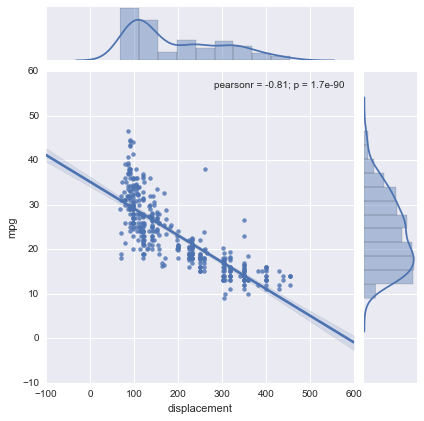

In [18]:
sns.jointplot('displacement', 'mpg',data, kind="reg")
print("R^2:", stats.pearsonr(X.values.flatten(),y.values)[0]**2)

Let's confirm the R-squared value for our simple linear model using `scikit-learn's` prebuilt R-squared scorer:

In [19]:
y_pred = linreg.predict(X)   # we give it the true values and predicted values
metrics.r2_score(y, y_pred)  # This is a way to measure how good of a model this is. This is the Pearson R
                             # coefficient and it indicates how closely our best-fit line explains the variation
                             # of the data. The R-squared score bing closer to 1 is always better.

0.64822940031930443

In [20]:
X.values.flatten()  # this gives us an idea of what the flatten functon is doing: It's basically a way of flattening 
                    # a dataframe to a list

array([ 307. ,  350. ,  318. ,  304. ,  302. ,  429. ,  454. ,  440. ,
        455. ,  390. ,  383. ,  340. ,  400. ,  455. ,  113. ,  198. ,
        199. ,  200. ,   97. ,   97. ,  110. ,  107. ,  104. ,  121. ,
        199. ,  360. ,  307. ,  318. ,  304. ,   97. ,  140. ,  113. ,
        232. ,  225. ,  250. ,  250. ,  232. ,  350. ,  400. ,  351. ,
        318. ,  383. ,  400. ,  400. ,  258. ,  140. ,  250. ,  250. ,
        122. ,  116. ,   79. ,   88. ,   71. ,   72. ,   97. ,   91. ,
        113. ,   97.5,   97. ,  140. ,  122. ,  350. ,  400. ,  318. ,
        351. ,  304. ,  429. ,  350. ,  350. ,  400. ,   70. ,  304. ,
        307. ,  302. ,  318. ,  121. ,  121. ,  120. ,   96. ,  122. ,
         97. ,  120. ,   98. ,   97. ,  350. ,  304. ,  350. ,  302. ,
        318. ,  429. ,  400. ,  351. ,  318. ,  440. ,  455. ,  360. ,
        225. ,  250. ,  232. ,  250. ,  198. ,   97. ,  400. ,  400. ,
        360. ,  350. ,  232. ,   97. ,  140. ,  108. ,   70. ,  122. ,
      

Two things to keep in mind when using R-squared:
  * The threshold for a **"good" R-squared value** is highly dependent on the particular domain.
  * R-squared is more useful as a tool for **comparing models**.

### Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features, which is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient:

$y = \beta_0 + \beta_1 \times acceleration + \beta_2 \times displacement + \beta_3 \times horsepower$

In [15]:
# create X and y except now with more columns in X
mult_feature_cols = ['acceleration', 'displacement', 'horsepower']   # take X to be 3 columns and Y to be 1 column
X_mult = data[mult_feature_cols]
y_mult = data.mpg     # Y is the miles per gallon column
print(X_mult.shape)
print(y_mult.shape)
# instantiate and fit like last time
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult, y_mult)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_   # this is the y-intercept, beta_0
# print the coefficients like last time
print(intercept) # this is beta_0
print(coeffs)   # we print out 3 coefficients: beta_1, beta_2, beta_3

(392, 3)
(392,)
46.2547074969
[-0.41222985 -0.03665995 -0.08878252]


In [22]:
# pair the feature names with the coefficients
zip(mult_feature_cols, multiple_linreg.coef_) # pairs items together from 2 columns, etc. (review this)
list(zip(mult_feature_cols, multiple_linreg.coef_))    # this works here too
# Gives us nice output including the coefficient name. Note that 'zip' "pairs" up the elements of a number of lists,
# tuples, or other sequences, to create a list tuples. 'zip' can take an arbitrary number of sequences, and the
# number of elements it produces is determined by the shortest sequence.


[('acceleration', -0.41222985131176554),
 ('displacement', -0.036659952890354772),
 ('horsepower', -0.088782524878143559)]

With this model we can interpret the coefficients as follows:

  * For a fixed amount of acceleration and engine displacement, an increase of 1 unit in **horsepower** is associated with a **decrease in mpg of the car of ~.09**.
  * For a fixed amount of displacement and horsepower, an increase of 1 m/s^2 in **acceleration** is associated with a **decrease in mpg of ~.41**.
  * For a fixed amount of acceleration and horsepower, an increase of 1 in **displacement** is associated with an **decrease in mpg of ~.04**.

Does this model have a better R<sup>2</sup> value?

In [23]:
y_mult_pred = multiple_linreg.predict(X_mult)
metrics.r2_score(y_mult, y_mult_pred)
# This model (with 3 features) has a slightly better R^2 value (0.674) than when the model had 1 feature (0.64822)

0.67487043130067081

#### Exercise Time
* Create the multiple regression when you use every variable except for mpg to predict mpg.
* What is this new r^2 value?

In [24]:
# pass
# create X and y except now with more columns in X
mult_feature_cols = ['acceleration', 'displacement', 'horsepower', 'weight', 'cylinders']  # take X to be 3 columns and Y is 1 column
X_mult_allf = data[mult_feature_cols]
y_mult_allf = data.mpg

# instantiate and fit like last time
multiple_linreg = LinearRegression()
multiple_linreg.fit(X_mult_allf, y_mult_allf)

coeffs = multiple_linreg.coef_
intercept =  multiple_linreg.intercept_
# print the coefficients like last time
print('The y-intercept is: ',intercept)
print('The coefficients are: ', coeffs)   # we print out 3 coefficients
print(zip(mult_feature_cols, multiple_linreg.coef_))
y_mult_pred_allf = multiple_linreg.predict(X_mult_allf)
print('The r^2 value for this case is: ', metrics.r2_score(y_mult_allf, y_mult_pred_allf))
# The new r^2 value is 0.708, which is better (closer to 1) than the case with fewer features

The y-intercept is:  46.2643078526
The coefficients are:  [ -2.91047140e-02  -8.31301222e-05  -4.52570802e-02  -5.18691735e-03
  -3.97928359e-01]
[('acceleration', -0.029104713990185715), ('displacement', -8.3130122225752792e-05), ('horsepower', -0.045257080150839873), ('weight', -0.0051869173476110607), ('cylinders', -0.39792835906422253)]
The r^2 value for this case is:  0.707692632677


### Evaluation metrics for regression problems

In order to evaluate how good a given regression model is, we need evaluation metrics designed for comparing **continuous values**. We will cover 3 common evaluation metrics for regression models here.

Let's create some example numeric predictions, and calculate the three most common evaluation metrics for regression problems:

In [25]:
# define true and predicted response values
fake_y_true = [101, 40, 30, 20]
fake_y_pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors/residuals:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [26]:
print("MAE for fake data:",metrics.mean_absolute_error(fake_y_true, fake_y_pred))

MAE for fake data: 12.75


**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [27]:
print("MSE for fake data:",metrics.mean_squared_error(fake_y_true,fake_y_pred))

MSE for fake data: 180.25


**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [28]:
print("RMSE for fake data:",np.sqrt(metrics.mean_squared_error(fake_y_true, fake_y_pred)))

RMSE for fake data: 13.4257215821


Lets compare these metrics in terms of their usefulness/interpretability:
  * **MAE** is the easiest to understand, because it's the average error.
  * **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
  * **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are what are called **loss functions**, because we want to minimize the **loss** (from getting stuff wrong).

#### Exercise Time
  * Calculate the MAE/MSE/RMSE of the simple linear regression model
  * Calculate the MAE/MSE/RMSE of the 3 feature multiple regression model
  * Calculate the MAE/MSE/RMSE of the model using all of the features
  * What do you notice about all of these metrics as you keep adding features?

In [29]:
# pass
print("MAE for simple linear regression model (1 feature): ",metrics.mean_absolute_error(y, y_pred))
print("MSE for simple linear regression model (1 feature): ",metrics.mean_squared_error(y, y_pred))
print("RMSE for simple linear regression model (1 feature): ",np.sqrt(metrics.mean_squared_error(y, y_pred)))
print("MAE for 3 feature linear regression model: ",metrics.mean_absolute_error(y_mult, y_mult_pred))
print("MSE for 3 feature linear regression model:",metrics.mean_squared_error(y_mult,y_mult_pred))
print("RMSE for 3 feature linear regression model:",np.sqrt(metrics.mean_squared_error(y_mult,y_mult_pred)))
print("MAE for all features linear regression model: ",metrics.mean_absolute_error(y_mult_allf, y_mult_pred_allf))
print("MSE for all features linear regression model:",metrics.mean_squared_error(y_mult_allf,y_mult_pred_allf))
print("RMSE for all features linear regression model:",np.sqrt(metrics.mean_squared_error(y_mult_allf,y_mult_pred_allf)))
# The metrics are decreasing as we keep adding features.

MAE for simple linear regression model (1 feature):  3.50627307866
MSE for simple linear regression model (1 feature):  21.3745449401
RMSE for simple linear regression model (1 feature):  4.62326128832
MAE for 3 feature linear regression model:  3.39916229426
MSE for 3 feature linear regression model: 19.7557629427
RMSE for 3 feature linear regression model: 4.44474554308
MAE for all features linear regression model:  3.22230013845
MSE for all features linear regression model: 17.7613961054
RMSE for all features linear regression model: 4.21442713846


### Using train/test split for model evaluation

How do we know that our model will perform well on new data?

Sure, we may know that our model has really low RMSE on all of the data we have on hand, but can we be sure that it will be exactly the same when we try to use our model in the real world?

One way we can get an estimate of how the model will perform "in the wild" is by building the model on a portion of our data, and then testing it on the remainder that we have.

So, we **act like we have one set of data for model building, and keep a separate set of data and treat it as if it were new.** We then test our model on this "new" data, and, **as long as the test data was taken in an unbiased way**, we can assume that the **loss** on the test data gives us a pretty good idea of what the error "in the wild" will be.

So, let's try to use train/test split to estimate the model's accuracy on unseen data.

The basic approach would be to randomly select a fraction of the data (>50% usually) for training, and the remainder (100-training%) for testing. We will use scikit-learn's `train_test_split` function to do this:

In [30]:
X_mult_train, X_mult_test, y_mult_train, y_mult_test = train_test_split(X_mult, y_mult, test_size=0.3, random_state=1)
# Split arrays or matrices into random train and test subsets
# -- use random state for debugging purposes
print("training data size:",X_mult_train.shape)
print("testing data size:",X_mult_test.shape)
print ("total data size:", X_mult.shape)
print("size of y_mult:", y_mult.shape)
print("size of y_mult_train: ", y_mult_train.shape)
print("size of y_mult_test: ", y_mult_test.shape)
# test_size : float, int, or None (default is None): If float, should be between 0.0 and 1.0 and represent the 
# proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If 
# None, the value is automatically set to the complement of the train size. If train size is also None, test size is 
# set to 0.25.

# train_size : float, int, or None (default is None): If float, should be between 0.0 and 1.0 and represent the 
# proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. 
# If None, the value is automatically set to the complement of the test size.
print(274./392*100)
print(118./392*100)

training data size: (274, 3)
testing data size: (118, 3)
total data size: (392, 3)
size of y_mult: (392,)
size of y_mult_train:  (274,)
size of y_mult_test:  (118,)
69.8979591837
30.1020408163


Now, we simply train on `X_mult_train` and `y_mult_train` and then generate predictions and evaluation metrics on `X_mult_test` and `y_mult_test`:

In [31]:
#train on training set
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_mult_train, y_mult_train)  # fit linear regression object on training data only

#generate predictions on training set and evaluate
y_mult_pred_train = mult_linreg2.predict(X_mult_train)
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_train, y_mult_pred_train)))

#generate predictions on test set and evaluate
y_mult_pred_test = mult_linreg2.predict(X_mult_test)
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_test, y_mult_pred_test)))
# Usually more data is better but not always

Training set RMSE: 4.41382089427
Test set RMSE: 4.60433157723


Notice that the test set error is greater than the training set error. This should almost always be the case (why?).

#### Exercise Time
  * Get MAE/MSE/RMSE training and test set predictions on the full linear regression model (using all features) with a test set of 30% of the data
  * Get MAE/MSE/RMSE training and test set predictions on the full linear regression model (using all features) with a test set of 20% of the data
  * Get MAE/MSE/RMSE training and test set predictions on the full linear regression model (using all features) with a test set of 10% of the data
  * Anything you notice about the test set error metrics?

In [32]:
# Get MAE/MSE/RMSE training and test set predictions on the full linear regression model (using all features) with a 
# test set of 30% of the data
X_mult_train_allf, X_mult_test_allf, y_mult_train_allf, y_mult_test_allf = train_test_split(X_mult_allf,\
                                                                            y_mult_allf,test_size=0.3, random_state=1)
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_mult_train_allf, y_mult_train_allf)  # fit linear regression object on training data only

#generate predictions on training set and evaluate
y_mult_pred_train_allf = mult_linreg2.predict(X_mult_train_allf)
print("Training set MAE: ",metrics.mean_absolute_error(y_mult_train_allf, y_mult_pred_train_allf))
print("Training set MSE: ",metrics.mean_squared_error(y_mult_train_allf,y_mult_pred_train_allf))
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_train_allf, y_mult_pred_train_allf)))

#generate predictions on test set and evaluate
y_mult_pred_test_allf = mult_linreg2.predict(X_mult_test_allf)
print("Test set MAE: ",metrics.mean_absolute_error(y_mult_test_allf, y_mult_pred_test_allf))
print("Test set MSE: ",metrics.mean_squared_error(y_mult_test_allf,y_mult_pred_test_allf))
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_test_allf, y_mult_pred_test_allf)))

Training set MAE:  3.25677829682
Training set MSE:  17.7419141447
Training set RMSE: 4.21211516281
Test set MAE:  3.11611568051
Test set MSE:  18.4902686502
Test set RMSE: 4.30003123828


In [33]:
X_mult_train_allf, X_mult_test_allf, y_mult_train_allf, y_mult_test_allf = train_test_split(X_mult_allf,\
                                                                            y_mult_allf,test_size=0.2, random_state=1)
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_mult_train_allf, y_mult_train_allf)  # fit linear regression object on training data only

#generate predictions on training set and evaluate
y_mult_pred_train_allf = mult_linreg2.predict(X_mult_train_allf)
print("Training set MAE: ",metrics.mean_absolute_error(y_mult_train_allf, y_mult_pred_train_allf))
print("Training set MSE: ",metrics.mean_squared_error(y_mult_train_allf,y_mult_pred_train_allf))
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_train_allf, y_mult_pred_train_allf)))

#generate predictions on test set and evaluate
y_mult_pred_test_allf = mult_linreg2.predict(X_mult_test_allf)
print("Test set MAE: ",metrics.mean_absolute_error(y_mult_test_allf, y_mult_pred_test_allf))
print("Test set MSE: ",metrics.mean_squared_error(y_mult_test_allf,y_mult_pred_test_allf))
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_test_allf, y_mult_pred_test_allf)))

Training set MAE:  3.19563760177
Training set MSE:  17.4664738332
Training set RMSE: 4.17929106826
Test set MAE:  3.26568653213
Test set MSE:  19.603886663
Test set RMSE: 4.42762765631


In [34]:
X_mult_train_allf, X_mult_test_allf, y_mult_train_allf, y_mult_test_allf = train_test_split(X_mult_allf,\
                                                                            y_mult_allf,test_size=0.1, random_state=1)
mult_linreg2 = LinearRegression()
mult_linreg2.fit(X_mult_train_allf, y_mult_train_allf)  # fit linear regression object on training data only

#generate predictions on training set and evaluate
y_mult_pred_train_allf = mult_linreg2.predict(X_mult_train_allf)
print("Training set MAE: ",metrics.mean_absolute_error(y_mult_train_allf, y_mult_pred_train_allf))
print("Training set MSE: ",metrics.mean_squared_error(y_mult_train_allf,y_mult_pred_train_allf))
print("Training set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_train_allf, y_mult_pred_train_allf)))

#generate predictions on test set and evaluate
y_mult_pred_test_allf = mult_linreg2.predict(X_mult_test_allf)
print("Test set MAE: ",metrics.mean_absolute_error(y_mult_test_allf, y_mult_pred_test_allf))
print("Test set MSE: ",metrics.mean_squared_error(y_mult_test_allf,y_mult_pred_test_allf))
print("Test set RMSE:",np.sqrt(metrics.mean_squared_error(y_mult_test_allf, y_mult_pred_test_allf)))

Training set MAE:  3.22111598655
Training set MSE:  17.7131172761
Training set RMSE: 4.20869543637
Test set MAE:  3.0683208131
Test set MSE:  18.4433023276
Test set RMSE: 4.29456660533


In [ ]:
# Anything you notice about the test set error metrics?
# If I've done this correctly, I'm not sure I'm seeing a clear trend with MAE, MSE, and RMSE as the test set percentage
# decreases. Need to think about this further.

### Overfitting and Underfitting

How do we know when a model will perform well on new data? What is happening when a model doesn't generalize well?

Let's create a new data set with many features.

Here are a few new sklearn features:

[PolynomialFeatures](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures) takes feature columns and generates new columns that are all features multiplied together up to the degree you specify. For 1 feature is generates x, x<sup>2</sup>, x<sup>3</sup>, ...

[Pipeline](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) is a convenience method that allows you to define a sequence of data transformations and then apply it to any data.

The following code is adapted from [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html).

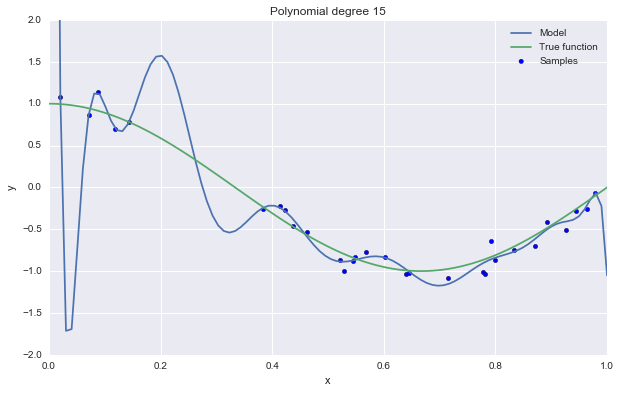

In [38]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation

np.random.seed(0)

n_samples = 30
# Try different values for degree: 1, 5, 15.  These are the degree(s) of the polynomial features.
# degree = 1
# degree = 5    # this is a good model
degree = 15   # it does an amazine job of fitting my our data  (overfitting)
# degree = 30   # RMSE close to 0 here --- a very overfit model: it's fit exactly to the data points, i.e.,
              # it's fitting the (random) noise 

# Here's the data we are trying to fit
true_fun = lambda X: np.cos(1.5 * np.pi * X)   # adding some random noise to a cosine function
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(10, 6))
polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
# include_bias : boolean -- If True (default), then include a bias column, the feature in which all polynomial 
# powers are zero (i.e. a column of ones - acts as an intercept term in a linear model).
linear_regression = LinearRegression()

pipeline = Pipeline([("polynomial_features", polynomial_features),    # allows us to apply a bunch of transformations
                     ("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Polynomial degree {}".format(degree))    # we didn't add any new features
plt.show()                                          # we fit a linear regression to it
# Model complexity may be too low, so we're not learning anything

### Model Complexity

**This is general, not specific to linear regression!**

If the model not complex enough -> then it doesn't really capture the behavior of the underlying function we are trying to learn. This is a high **bias** situation and the model is **underfit**.

If the model is too complex -> then it has learned too much. It is "fit to the noise" and not the underlying function. This is called high **variance** or **overfit**.

Bias and variance are two types of errors. In a well-fit model, they are roughly equal. There are several ways to test and combat these types of errors.

1. Underfit: Build more features.
2. Overfit: Reduce number of features, get more data.

We'll also talk about model specific ways to control model complexity.

![Test](../images/highvariance.png)

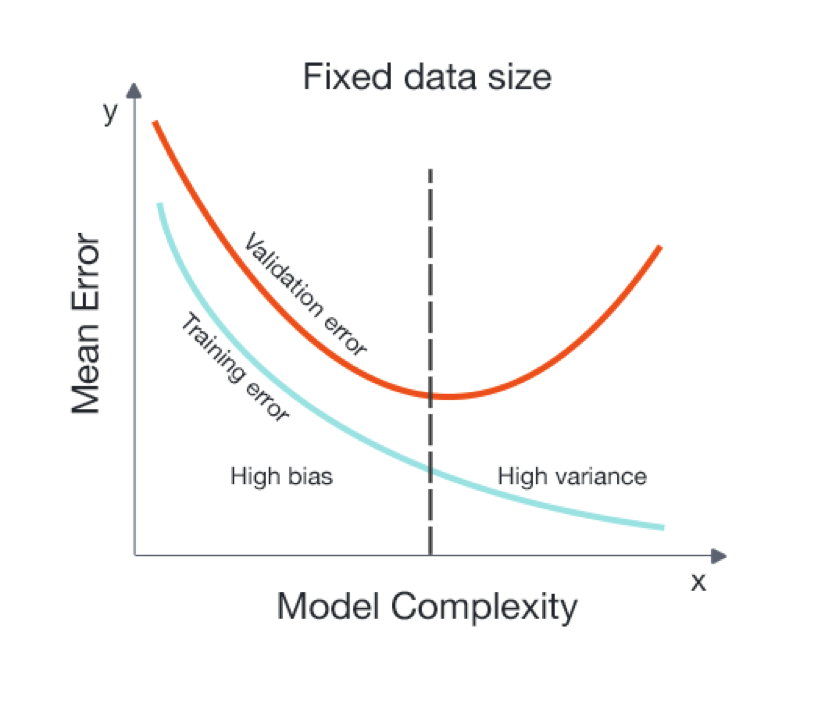

In [39]:
from IPython.core.display import Image 
Image(filename='/Users/markyashar/sf16_ids1/images/highvariance.png')

### Summary of linear regression and comparison with other models (you will see in the future)

There are some obvious advantages to linear regression models:
  * These kinds of models are very simple to explain
  * They are highly interpretable
  * Model training and prediction is very fast
  * Features do not need to be scaled (we will talk about feature scaling later)
  * They can perform well with a small number of observations

However, linear regression also has some significant disadvantages:
  * It assumes a linear relationship between the features and the outcome. This isn't always (almost never) the case.
  * Performance is (generally) not competitive with the best supervised learning methods
  * When you have lots of features, this approach can become sensitive to useless features
  * This approach can't automatically learn feature interactions (although you can code them into a linear regression, will show you how to do that soon!)